# Adaptive averaging

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm

%matplotlib widget

## Settings

In [18]:
confint_percentage = 0.95
confint_stddev_low, confint_stddev_high = norm.interval(confint_percentage)

confint_percentage_half = (1 - confint_percentage) / 2
confint_percentile_low = confint_percentage_half
confint_percentile_high = 1 - confint_percentage_half

## Averaging algorithm

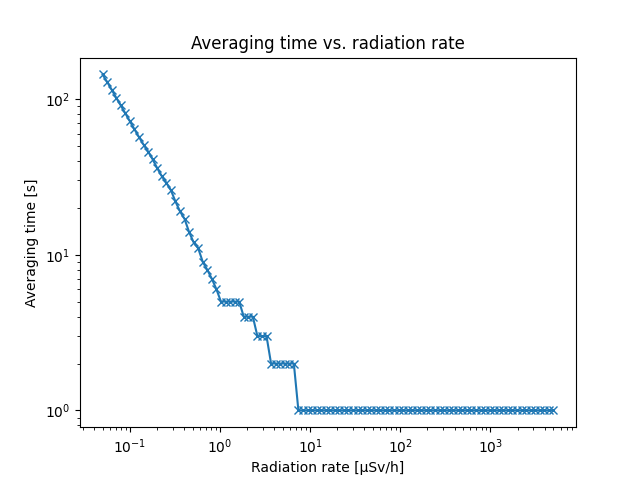

In [19]:
tube = 'm4011'

uSv_h_min = 0.05

if tube == 'm4011':
    conversion_factor = 150

elif tube == 'j614':
    conversion_factor = 68.4

uSv_h = uSv_h_min * np.logspace(0, 5, 100)
cps = uSv_h * conversion_factor / 60

avg_time_0_3 = 18 / (0.3 * conversion_factor / 60)
transition_exp = np.log(avg_time_0_3 / 5) / np.log(0.3)

avg_time = []
for uSv_h_value in uSv_h:
    cps_value = uSv_h_value * conversion_factor / 60

    if uSv_h_value > 0.3 and uSv_h_value < 1:
        avg_time_value = np.ceil(5 * uSv_h_value ** transition_exp)

    else:
        avg_time_value = np.ceil(18 / cps_value)

        if uSv_h_value >= 1:
            if avg_time_value > 5:
                avg_time_value = 5

    avg_time.append(avg_time_value)

plt.figure()
plt.title('Averaging time vs. radiation rate')
plt.xlabel('Radiation rate [µSv/h]')
plt.ylabel('Averaging time [s]')
plt.loglog(uSv_h, avg_time, marker='x')
plt.show()

## Resulting confidence intervals

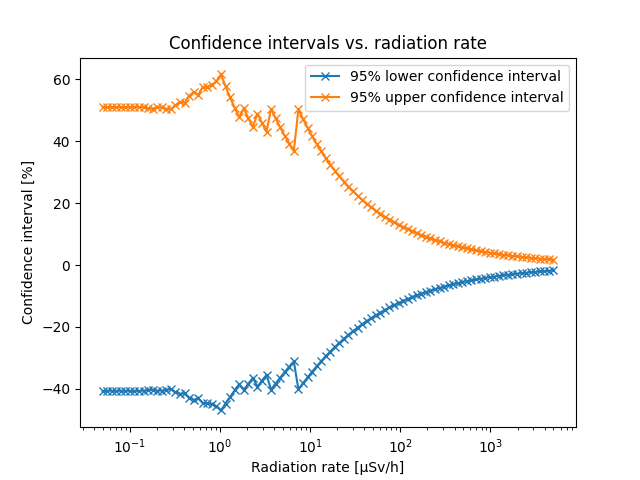

In [20]:
n = cps * avg_time

n_low = 0.5 * chi2.ppf(confint_percentile_low, df=2 * n)
n_high = 0.5 * chi2.ppf(confint_percentile_high, df=2 * n)

confint_low = (n_low - n) / n
confint_high = (n_high - n) / n

plt.figure()
plt.title('Confidence intervals vs. radiation rate')
plt.xlabel('Radiation rate [µSv/h]')
plt.ylabel('Confidence interval [%]')
c1, = plt.semilogx(uSv_h, 100 * confint_low, marker='x', label='95% lower confidence interval')
c2, = plt.semilogx(uSv_h, 100 * confint_high, marker='x', label='95% upper confidence interval')
plt.legend(handles=[c1, c2], loc='upper right')
plt.show()